<a href="https://colab.research.google.com/github/Dharvi-k/Pytorch_Workflow/blob/main/pytorch_practice_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.
**Make a binary classification dataset with Scikit-Learn's make_moons() function.**

**For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors.****

**Split the data into training and test sets using train_test_split with 80% training and 20% testing.**

In [ ]:
import torch
from torch import nn

In [ ]:
# Setting up device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Importing dependencies
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Number of samples
n_samples=1000
x,y=make_moons(n_samples,noise=0.2,random_state=42)
print(x.shape,y.shape)
x[:10],y[:10]

(1000, 2) (1000,)


(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604],
        [ 0.66250998, -0.08435588],
        [ 0.27450961, -0.18990367],
        [-0.11555577,  0.53591195],
        [ 1.57236902, -0.33544711],
        [ 0.76398981,  0.96235883]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turning data into tensors
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
# Splittimg the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


Since we have created the data let's just check it wheter it is linearly seprable or not, by plotting it.

In [ ]:
x.size(),y.size()

(torch.Size([1000, 2]), torch.Size([1000]))

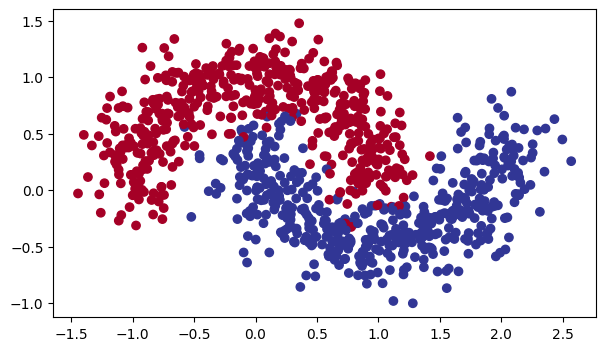

In [ ]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)


Since the data is not linearly seprable we need to introduce non linearity into the model.

# 2.
**Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.**

**Feel free to use any combination of PyTorch layers (linear and non-linear) you want.**

In [ ]:
# Importing dependencies
from torch import nn

In [ ]:
# Building a Model
class MoonModel_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
         nn.Linear(in_features=2,out_features=10),
         nn.ReLU(),
         nn.Linear(in_features=10,out_features=10),
         nn.ReLU(),

         nn.Linear(in_features=10,out_features=1)

    )
  def forward(self,x):
    return self.linear_layer_stack(x)
# Creating an instance of our model
model_1=MoonModel_1()
model_1

MoonModel_1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

# 3.
**Setup a binary classification compatible loss function and optimizer to use when training the model.**


In [ ]:
# Setting up loss function and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

# 4.
**Create a training and testing loop to fit the model you created in 2 to the data you created in 1.**

**To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.**

**Train the model for long enough for it to reach over 96% accuracy.**

**The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.**

In [ ]:
# Craeting a accuracy function
def accuracy(y_true,y_pred):
  correct=(y_true==y_pred).sum().item()
  total=len(y_true)
  accuracy=(correct/total)*100    #converting into percentage
  return accuracy

In [ ]:
# creating a training and testing loop

# setting the number of epochs
epochs=1500

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. forwars pass
  y_logits=model_1(x_train).squeeze()
  y_pred_prob=torch.sigmoid(y_logits)
  y_pred=torch.round(y_pred_prob)


  # 2. calculete the loss and accuracy
  loss=loss_fn(y_logits,y_train)
  acc=accuracy(y_true=y_train,
               y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. step the optmizer
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits=model_1(x_test).squeeze()
    test_pred_prob=torch.sigmoid(test_logits)
    test_pred=torch.round(test_pred_prob)
    # 2.calculate loss/acc
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,
                      y_pred=test_pred)
 # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.70 Acc: 27.25 | Test loss: 0.70 Test acc: 39.00
Epoch: 100 | Loss: 0.33 Acc: 84.38 | Test loss: 0.35 Test acc: 82.00
Epoch: 200 | Loss: 0.29 Acc: 87.12 | Test loss: 0.29 Test acc: 87.00
Epoch: 300 | Loss: 0.27 Acc: 87.50 | Test loss: 0.27 Test acc: 87.50
Epoch: 400 | Loss: 0.26 Acc: 88.25 | Test loss: 0.25 Test acc: 87.50
Epoch: 500 | Loss: 0.25 Acc: 88.62 | Test loss: 0.24 Test acc: 89.50
Epoch: 600 | Loss: 0.22 Acc: 90.25 | Test loss: 0.21 Test acc: 91.00
Epoch: 700 | Loss: 0.20 Acc: 91.38 | Test loss: 0.19 Test acc: 91.50
Epoch: 800 | Loss: 0.17 Acc: 93.00 | Test loss: 0.16 Test acc: 94.00
Epoch: 900 | Loss: 0.14 Acc: 95.25 | Test loss: 0.13 Test acc: 95.50
Epoch: 1000 | Loss: 0.12 Acc: 96.00 | Test loss: 0.10 Test acc: 97.50
Epoch: 1100 | Loss: 0.10 Acc: 96.38 | Test loss: 0.08 Test acc: 97.50
Epoch: 1200 | Loss: 0.09 Acc: 96.88 | Test loss: 0.07 Test acc: 97.50
Epoch: 1300 | Loss: 0.08 Acc: 96.88 | Test loss: 0.07 Test acc: 97.50
Epoch: 1400 | Loss: 0.08 Acc: 96

# 5.
**Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.**

In [ ]:

# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    x, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    x_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(x_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

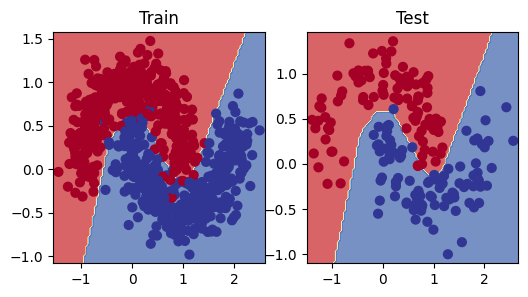

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)


# 6.
**Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.**

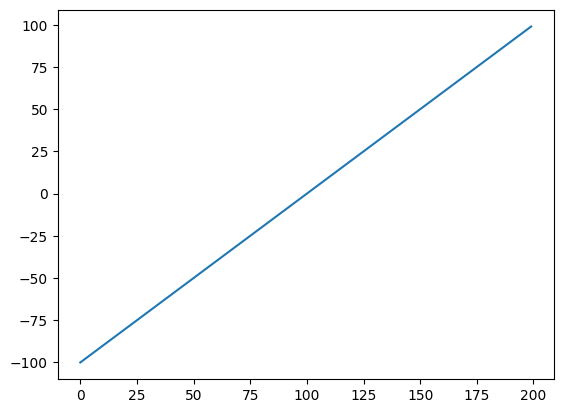

In [ ]:
tensor_A=torch.arange(-100,100,1)
plt.plot(tensor_A)

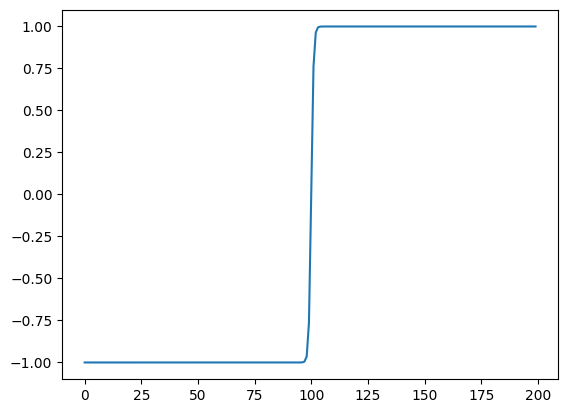

In [ ]:
plt.plot(torch.tanh(tensor_A))

#7.
**Create a multi-class dataset using the spirals data creation function from CS231n .**

**Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).**

**Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).**

**Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).**

**Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.**

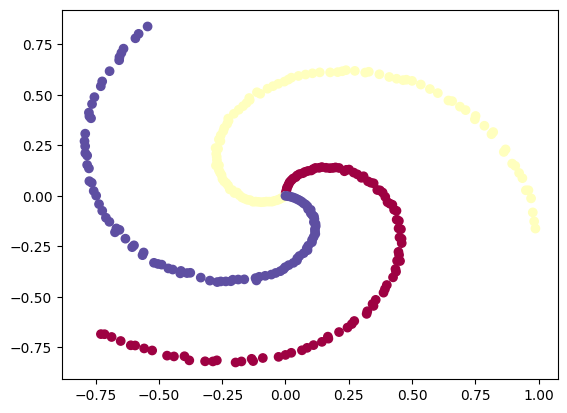

In [ ]:
import numpy as np
n=100  #number of points per class
d=2    #number of dimensions
k=3    #number of classes

x=np.zeros((n*k,d))
y=np.zeros(n*k,dtype='uint8')

for j in range(3):
  ix=range(n*j,n*(j+1))
  r=np.linspace(0.0,1,n)
  t=np.linspace(j*4,(j+1)*4,n)
  t=np.linspace(j*4,(j+1)*4,n)+np.random.randn(n)*0.02
  x[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
  y[ix]=j
# let's plot the data
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Spectral)
plt.show()

In [ ]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42
                                              )
len(x_train),len(x_test),len(y_train),len(y_test)

(240, 60, 240, 60)

In [ ]:
# converting dsta into tensors
x_train,y_train=torch.from_numpy(x_train).type(torch.float),torch.from_numpy(y_train).type(torch.long)
x_test,y_test=torch.from_numpy(x_test).type(torch.float),torch.from_numpy(y_test).type(torch.long)

In [ ]:
# creating a model
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers_stack=nn.Sequential(
        nn.Linear(in_features=2,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=3)
    )
  def forward(self,x):
    return self.layers_stack(x)
# creating instance of our model
model_2=SpiralModel()
model_2


SpiralModel(
  (layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [ ]:
# Building a loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_2.parameters(),
                          lr=0.01)

In [ ]:
# Building an accuracy function
def accuracy(y_true,y_pred):
  correct=(y_true==y_pred).sum().item()
  total=len(y_true)
  accuracy=(correct/total)*100
  return accuracy


In [ ]:
# Building a training and testing loop

# setting number of epochs
epochs=200

for epoch in range(epochs):
  ### Training
  model_2.train()

  # 1. forward pass
  y_logits=model_2(x_train)
  y_pred=torch.argmax(y_logits,dim=1)

  # 2. calculate the loss
  loss=loss_fn(y_logits,y_train)
  acc=accuracy(y_true=y_train,
               y_pred=y_pred)

  # 3. optimizer zero gradient
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()


  # 5. optimizer step()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits=model_2(x_test)
    test_pred=torch.argmax(test_logits,dim=1)
    # 2. calculate the loss
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,
                      y_pred=test_pred)
  # let's print out what's happening after very 10 epochs
  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f} | Accuracy:{acc:.2f} | Test Loss:{test_loss:.5f} | Test Accuracy:{test_acc:.2f}")

Epoch:0 | Loss:1.09718 | Accuracy:32.50 | Test Loss:1.08964 | Test Accuracy:36.67
Epoch:10 | Loss:0.99604 | Accuracy:64.58 | Test Loss:0.99249 | Test Accuracy:56.67
Epoch:20 | Loss:0.84149 | Accuracy:57.50 | Test Loss:0.84995 | Test Accuracy:50.00
Epoch:30 | Loss:0.69670 | Accuracy:58.75 | Test Loss:0.74691 | Test Accuracy:48.33
Epoch:40 | Loss:0.61773 | Accuracy:60.42 | Test Loss:0.68436 | Test Accuracy:51.67
Epoch:50 | Loss:0.55745 | Accuracy:63.75 | Test Loss:0.60368 | Test Accuracy:60.00
Epoch:60 | Loss:0.49512 | Accuracy:69.17 | Test Loss:0.52030 | Test Accuracy:71.67
Epoch:70 | Loss:0.43736 | Accuracy:74.58 | Test Loss:0.45124 | Test Accuracy:73.33
Epoch:80 | Loss:0.38362 | Accuracy:78.33 | Test Loss:0.39867 | Test Accuracy:75.00
Epoch:90 | Loss:0.32899 | Accuracy:84.58 | Test Loss:0.34265 | Test Accuracy:80.00
Epoch:100 | Loss:0.27413 | Accuracy:88.75 | Test Loss:0.28343 | Test Accuracy:85.00
Epoch:110 | Loss:0.22110 | Accuracy:92.08 | Test Loss:0.22157 | Test Accuracy:91.67
Epo

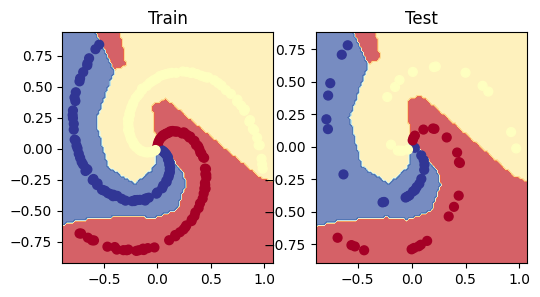

In [ ]:
# lets plot the data
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,x_test,y_test)